데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None

데이터 통계 요약:
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000

C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: User

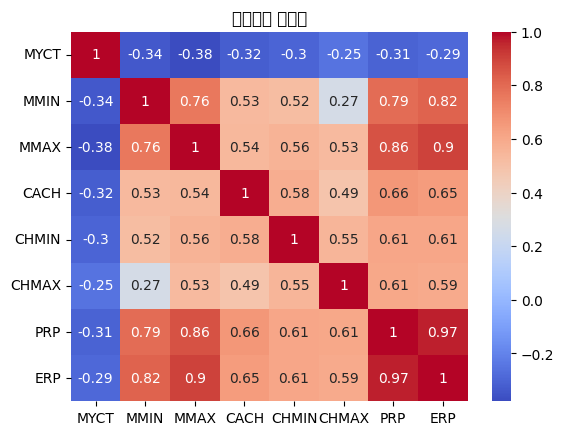

C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWa


교차 검증 R^2 점수: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
평균 교차 검증 R^2 점수: 0.6508224821731211


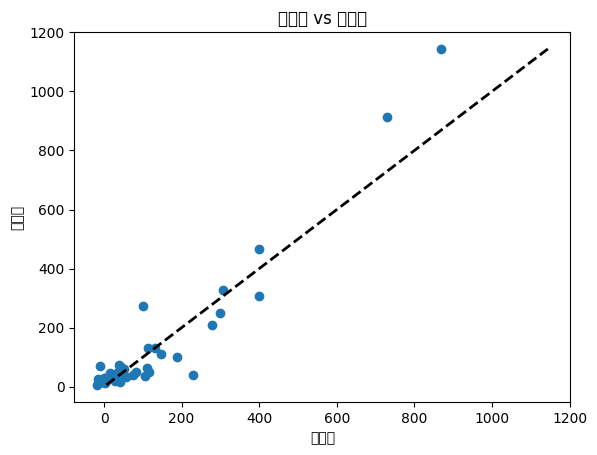

C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


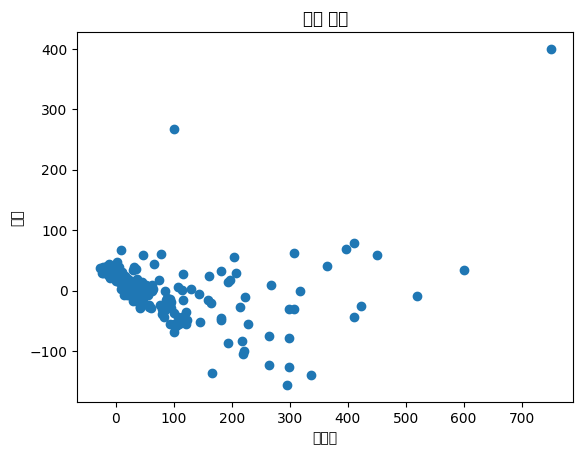

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 로드
data = pd.read_csv('machine_data.csv')

# 데이터 정보 출력
print("데이터 정보:")
print(data.info())
print("\n데이터 통계 요약:")
print(data.describe())

print("\n데이터 샘플:")
print(data.head())

numeric_data = data.select_dtypes(include=[np.number])
print("\n숫자형 열들:\n", numeric_data.columns)

# 상관관계 히트맵 시각화
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("상관관계 히트맵")
plt.show()

X = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = data["PRP"]

# 훈련 데이터와 테스트 데이터 분리 (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습 데이터에 대한 예측
train_pred = model.predict(X_train)

# 테스트 데이터에 대한 예측
test_pred = model.predict(X_test)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("\n교차 검증 R^2 점수:", cv_scores)
print("평균 교차 검증 R^2 점수:", np.mean(cv_scores))

# 학습 데이터와 테스트 데이터 예측 시각화
plt.scatter(test_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("예측값 vs 실제값")
plt.show()

# 잔차 분석
plt.scatter(train_pred, y_train - train_pred)
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차 플롯")
plt.show()

In [16]:
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("\n학습 데이터 성능 평가:")
print("학습 MSE:", train_mse)
print("학습 MAE:", train_mae)
print("학습 R^2:", train_r2)

# 테스트 데이터 성능 평가
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\n테스트 데이터 성능 평가:")
print("테스트 MSE:", test_mse)
print("테스트 MAE:", test_mae)
print("테스트 R^2:", test_r2)


학습 데이터 성능 평가:
학습 MSE: 3117.658905430178
학습 MAE: 35.12200634651681
학습 R^2: 0.8378284557995717

테스트 데이터 성능 평가:
테스트 MSE: 5633.06815579327
테스트 MAE: 48.068801347004765
테스트 R^2: 0.8893455830696771


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Polynomial Features 추가 (2차항)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Ridge Regression with Polynomial Features
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_poly_train, y_train)

# 최적의 alpha 값과 R^2 스코어 확인
print("\nRidge Regression:")
print("최적의 Ridge alpha:", ridge_cv.best_params_)
print("최적의 Ridge R^2 점수:", ridge_cv.best_score_)

# Ridge 모델의 테스트 세트 성능 평가
ridge_pred = ridge_cv.predict(X_poly_test)
print("Ridge 테스트 R^2:", r2_score(y_test, ridge_pred))
print("Ridge 테스트 MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge 테스트 MAE:", mean_absolute_error(y_test, ridge_pred))

# Lasso Regression with Polynomial Features
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_poly_train, y_train)

# 최적의 alpha 값과 R^2 스코어 확인
print("\nLasso Regression:")
print("최적의 Lasso alpha:", lasso_cv.best_params_)
print("최적의 Lasso R^2 점수:", lasso_cv.best_score_)

# Lasso 모델의 테스트 세트 성능 평가
lasso_pred = lasso_cv.predict(X_poly_test)
print("Lasso 테스트 R^2:", r2_score(y_test, lasso_pred))
print("Lasso 테스트 MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso 테스트 MAE:", mean_absolute_error(y_test, lasso_pred))

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_cv.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 R^2 스코어 확인
print("\nRandom Forest Regressor:")
print("최적의 Random Forest 하이퍼파라미터:", rf_cv.best_params_)
print("최적의 Random Forest R^2 점수:", rf_cv.best_score_)

# Random Forest 모델의 테스트 세트 성능 평가
rf_pred = rf_cv.predict(X_test)
print("Random Forest 테스트 R^2:", r2_score(y_test, rf_pred))
print("Random Forest 테스트 MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest 테스트 MAE:", mean_absolute_error(y_test, rf_pred))

# 최종 모델의 성능이 R^2 90% 이상인 경우 출력
if r2_score(y_test, ridge_pred) > 0.9:
    print("Ridge Regression 모델이 R^2 90% 이상을 달성했습니다.")
elif r2_score(y_test, lasso_pred) > 0.9:
    print("Lasso Regression 모델이 R^2 90% 이상을 달성했습니다.")
elif r2_score(y_test, rf_pred) > 0.9:
    print("Random Forest 모델이 R^2 90% 이상을 달성했습니다.")
else:
    print("어느 모델도 R^2 90% 이상을 달성하지 못했습니다.")

C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.53465e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.03348e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.23246e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.70786e-18): result may not be accurate.
  return linalg.solve(A, Xy, 


Ridge Regression:
최적의 Ridge alpha: {'alpha': 100}
최적의 Ridge R^2 점수: 0.40481790437666004
Ridge 테스트 R^2: 0.84181583514786
Ridge 테스트 MSE: 8052.658054675121
Ridge 테스트 MAE: 39.756849334933456


C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+04, tolerance: 1.499e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.912e+04, tolerance: 2.826e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 


Lasso Regression:
최적의 Lasso alpha: {'alpha': 10}
최적의 Lasso R^2 점수: 0.5035676584726536
Lasso 테스트 R^2: 0.838636844860204
Lasso 테스트 MSE: 8214.490446492313
Lasso 테스트 MAE: 39.844586587081366
